In [1]:
from skimage.morphology import medial_axis, skeletonize
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from scipy.ndimage.measurements import label

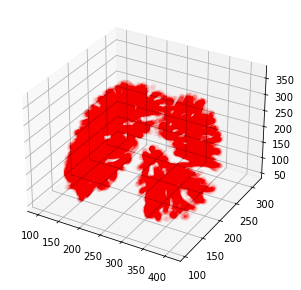

In [2]:
vess = nib.load('../data/vessels.nii.gz')
affine = vess.affine
vess = vess.get_fdata()

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

pos = np.where(vess==1)
ax.scatter(pos[0], pos[1], pos[2], c='red', alpha=0.005)
plt.show()

In [ ]:
# dividing in connected components
labeled, _ = label(vess)

# find components with more than few labels
unique, counts = np.unique(labeled, return_counts=True)
labels = unique[counts > 100][1:]

n = 1
multilab = np.zeros_like(vess)
multiskel = np.zeros_like(vess)

for i, l in enumerate(labels):
    mask = (labeled == l)
    skel = skeletonize(mask.astype(np.uint8))
    if(np.sum(skel) > 30):
        multilab = multilab + mask * n
        multiskel = multiskel + skel * n
        n = n + 1

# save into nifti file
ve = nib.Nifti1Image(multilab.astype(np.float64), affine)
sk = nib.Nifti1Image(multiskel.astype(np.float64), affine)
nib.save(ve, '../data/multilab_vess.nii.gz')
nib.save(sk, '../data/multiskel_vess.nii.gz')


Error: Session cannot generate requests

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

pos = np.where(labeled == labels[0])
ax.scatter(pos[0], pos[1], pos[2], c='red', alpha=1)
plt.show()

In [ ]:
n = 0
for i, l in enumerate(labels):
    mask = (labeled == l)
    skel = skeletonize(mask.astype(np.uint8))
    if(np.sum(skel) > 30):
        img = nib.Nifti1Image(labeled.astype(np.float64), affine)
        nib.save(img, f'../data/vessels/vess_{n}.nii.gz')
        n = n + 1
        

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

pos = np.where(skel==1)
ax.scatter(pos[0], pos[1], pos[2], c='black', s = 3)
pos = np.where(mask==1)
ax.scatter(pos[0], pos[1], pos[2], c='red', alpha=0.05)
plt.show()